# Data cleaning notebook

### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd

## Import the raw datasets and selecting France

#### ICU capacity data

In [3]:
df_ICU = pd.read_csv('ICU_capacity.tsv', sep='\t')

In [4]:
df_ICU.head()

,country,AcuteCare,AcuteCarPer100k,IMCU,ICU,CriticalCare,CriticalCarePer100k,percentOfTotal,GDP
0,Andorra,188,224,,,6,7.1,3.2,482.2
1,Austria,48446,635,569,1264,1833,21.8,3.4,205.9
2,Belgium,50156,456,,,1755,15.9,3.5,266.5
3,Bulgaria,57460,766,,,913,12.2,1.6,52.2
4,Croatia,15629,353,,,650,14.7,4.2,93.6


In [5]:
# Row index of France is 10, selecting by country column value did not seem to work for some reason
df_ICU_fr = df_ICU.iloc[10, :]

In [6]:
df_ICU_fr

country                France 
AcuteCare               232821
AcuteCarPer100k            358
IMCU                     3471 
ICU                      4069 
CriticalCare              7540
CriticalCarePer100k       11.6
percentOfTotal             3.2
GDP                      339.9
Name: 10, dtype: object

In [7]:
pop_france = df_ICU_fr['CriticalCare'] / df_ICU_fr['CriticalCarePer100k'] * 100000
pop_france

65000000.0

#### Number of cases data

In [8]:
df_cases = pd.read_csv('JHU_confirmed_global_iso3_regions.csv')
df_deaths = pd.read_csv('JHU_deaths_global_iso3_regions.csv')
df_recovered = pd.read_csv('JHU_recovered_global_iso3_regions.csv')

In [9]:
df_cases = df_cases.drop(df_cases.index[0])
df_deaths = df_deaths.drop(df_deaths.index[0])
df_recovered = df_recovered.drop(df_recovered.index[0])

In [10]:
df_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1703.0,1828.0,1939.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,736.0,750.0,766.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,3517.0,3649.0,3848.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,743.0,743.0,743.0,AND,150,Europe,39,Southern Europe,NaN,NaN
5,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,27.0,27.0,AGO,2,Africa,202,Sub-Saharan Africa,17,Middle Africa


In [11]:
df_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1703.0,1828.0,1939.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,736.0,750.0,766.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,3517.0,3649.0,3848.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,743.0,743.0,743.0,AND,150,Europe,39,Southern Europe,NaN,NaN
5,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,27.0,27.0,AGO,2,Africa,202,Sub-Saharan Africa,17,Middle Africa


In [12]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,220.0,228.0,252.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,422.0,431.0,455.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,1558.0,1651.0,1702.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,385.0,398.0,423.0,AND,150,Europe,39,Southern Europe,NaN,NaN
5,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,7.0,AGO,2,Africa,202,Sub-Saharan Africa,17,Middle Africa


In [13]:
# Select only the country France and not its overseas territories
df_cases_fr = df_cases.loc[(df_cases['Country/Region'] == 'France') & (df_cases['Province/State'].isnull())]

In [14]:
df_cases_fr

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
117,NaN,France,46.2276,2.2137,0.0,0.0,2.0,3.0,3.0,3.0,...,164589.0,167605.0,165093.0,FRA,150,Europe,155,Western Europe,NaN,NaN


In [15]:
df_deaths_fr = df_deaths.loc[(df_deaths['Country/Region'] == 'France') & (df_deaths['Province/State'].isnull())]

In [16]:
df_deaths_fr

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
117,NaN,France,46.2276,2.2137,0.0,0.0,0.0,0.0,0.0,0.0,...,23293.0,23660.0,24087.0,FRA,150,Europe,155,Western Europe,NaN,NaN


In [17]:
df_recovered_fr = df_recovered.loc[(df_recovered['Country/Region'] == 'France') & (df_recovered['Province/State'].isnull())]

In [18]:
df_recovered_fr

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
109,NaN,France,46.2276,2.2137,0.0,0.0,0.0,0.0,0.0,0.0,...,45513.0,46886.0,48228.0,FRA,150,Europe,155,Western Europe,NaN,NaN


In [19]:
cols_to_drop = ['Province/State', 
                'Lat', 
                'Long', 
                'ISO 3166-1 Alpha 3-Codes', 
                'Region Code', 
                'Region Name', 
                'Sub-region Code', 
                'Sub-region Name', 
                'Intermediate Region Code', 
                'Intermediate Region Name']

In [20]:
# Drop unnecessary columns
df_cases_fr = df_cases_fr.drop(cols_to_drop, axis=1)
df_deaths_fr = df_deaths_fr.drop(cols_to_drop, axis=1)
df_recovered_fr = df_recovered_fr.drop(cols_to_drop, axis=1)

In [21]:
df_cases_fr

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
117,France,0.0,0.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,...,154188.0,156921.0,154715.0,157026.0,158636.0,160292.0,160847.0,164589.0,167605.0,165093.0


In [22]:
df_cases_fr = df_cases_fr.rename(index={117: 'cases'})
df_deaths_fr = df_deaths_fr.rename(index={117: 'deaths'})
df_recovered_fr = df_recovered_fr.rename(index={109: 'recovered'})

In [23]:
df_fr = pd.concat([df_cases_fr, df_deaths_fr, df_recovered_fr])

In [24]:
df_fr.to_csv('CasesDeathsRecoveredFrance.csv')

In [31]:
df_fr_transposed = df_fr.transpose()

In [33]:
df_fr_transposed

,cases,deaths,recovered
Country/Region,France,France,France
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,2,0,0
1/25/20,3,0,0
...,...,...,...
4/25/20,160292,22614,44594
4/26/20,160847,22856,44903
4/27/20,164589,23293,45513
4/28/20,167605,23660,46886


In [36]:
df_fr_trp = df_fr_transposed.reset_index()
df_fr_trp = df_fr_trp.iloc[2:] 
df_fr_trp = df_fr_trp.reset_index()

In [46]:
df_fr_trp

,level_0,index,cases,deaths,recovered
0,2,1/23/20,0,0,0
1,3,1/24/20,2,0,0
2,4,1/25/20,3,0,0
3,5,1/26/20,3,0,0
4,6,1/27/20,3,0,0
...,...,...,...,...,...
93,95,4/25/20,160292,22614,44594
94,96,4/26/20,160847,22856,44903
95,97,4/27/20,164589,23293,45513
96,98,4/28/20,167605,23660,46886


In [49]:
del df_fr_trp['level_0']

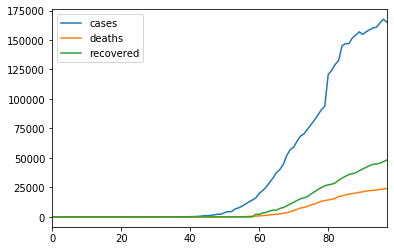

In [51]:
df_fr_trp.plot()

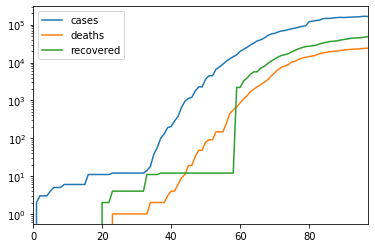

In [52]:
df_fr_trp.plot(logy=True)

In [53]:
from scipy.optimize import curve_fit
init_vals = [1,0,1]

In [10]:
df_italy = pd.read_csv("../../data/Test/ThreeScenariosItaly.csv")
df_france_fixed = pd.read_csv("../../data/Test/CasesDeathsRecoveredFrance.csv")

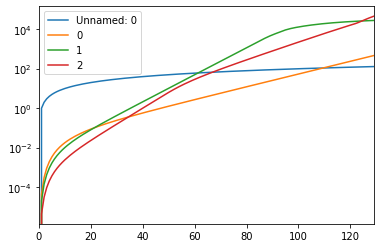

In [8]:
df_italy.plot(logy=True)

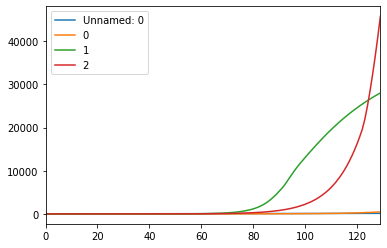

In [9]:
df_italy.plot()

In [13]:
df_france_fixed = df_france_fixed.transpose()

In [16]:

df_france_fixed = df_france_fixed.iloc[2:] 
df_france_fixed = df_france_fixed.reset_index()

In [18]:
df_france_fixed.to_csv("France_cases.csv")